<a href="https://colab.research.google.com/github/lucaspinheiro27/Python_statistics/blob/main/Jupyter_notebooks/Gym_members.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
gym = pd.read_csv('/content/gym_members_exercise_tracking.csv')
gym.sample(7)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
801,24,Male,88.2,1.79,177,154,65,1.76,1491.0,HIIT,11.3,3.5,4,3,27.53
655,49,Female,78.9,1.73,182,151,64,1.38,938.0,Cardio,34.0,2.3,2,1,26.36
95,59,Female,54.6,1.57,164,169,64,0.58,441.0,Cardio,29.2,2.3,3,1,22.15
339,57,Female,46.1,1.76,165,130,60,1.44,842.0,Strength,25.8,1.7,3,2,14.88
358,40,Male,51.7,1.82,161,160,71,0.90,792.0,Strength,21.4,3.0,3,1,15.61
156,56,Female,40.4,1.80,196,165,72,1.23,913.0,Cardio,30.0,2.1,4,2,12.47
689,21,Male,86.6,1.86,163,129,58,1.37,972.0,HIIT,21.8,2.6,3,2,25.03


In [41]:
gym.isnull().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [42]:
gym_dummy = pd.get_dummies(gym)
gym = gym_dummy.drop(columns='Gender_Female')
gym

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,True,False,False,False,True
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,False,False,True,False,False
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,False,True,False,False,False
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,True,False,False,True,False
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,87.1,1.74,187,158,67,1.57,1364.0,10.0,3.5,4,3,28.77,True,False,False,True,False
969,25,66.6,1.61,184,166,56,1.38,1260.0,25.0,3.0,2,1,25.69,True,False,False,True,False
970,59,60.4,1.76,194,120,53,1.72,929.0,18.8,2.7,5,3,19.50,False,True,False,False,False
971,32,126.4,1.83,198,146,62,1.10,883.0,28.2,2.1,3,2,37.74,True,False,True,False,False


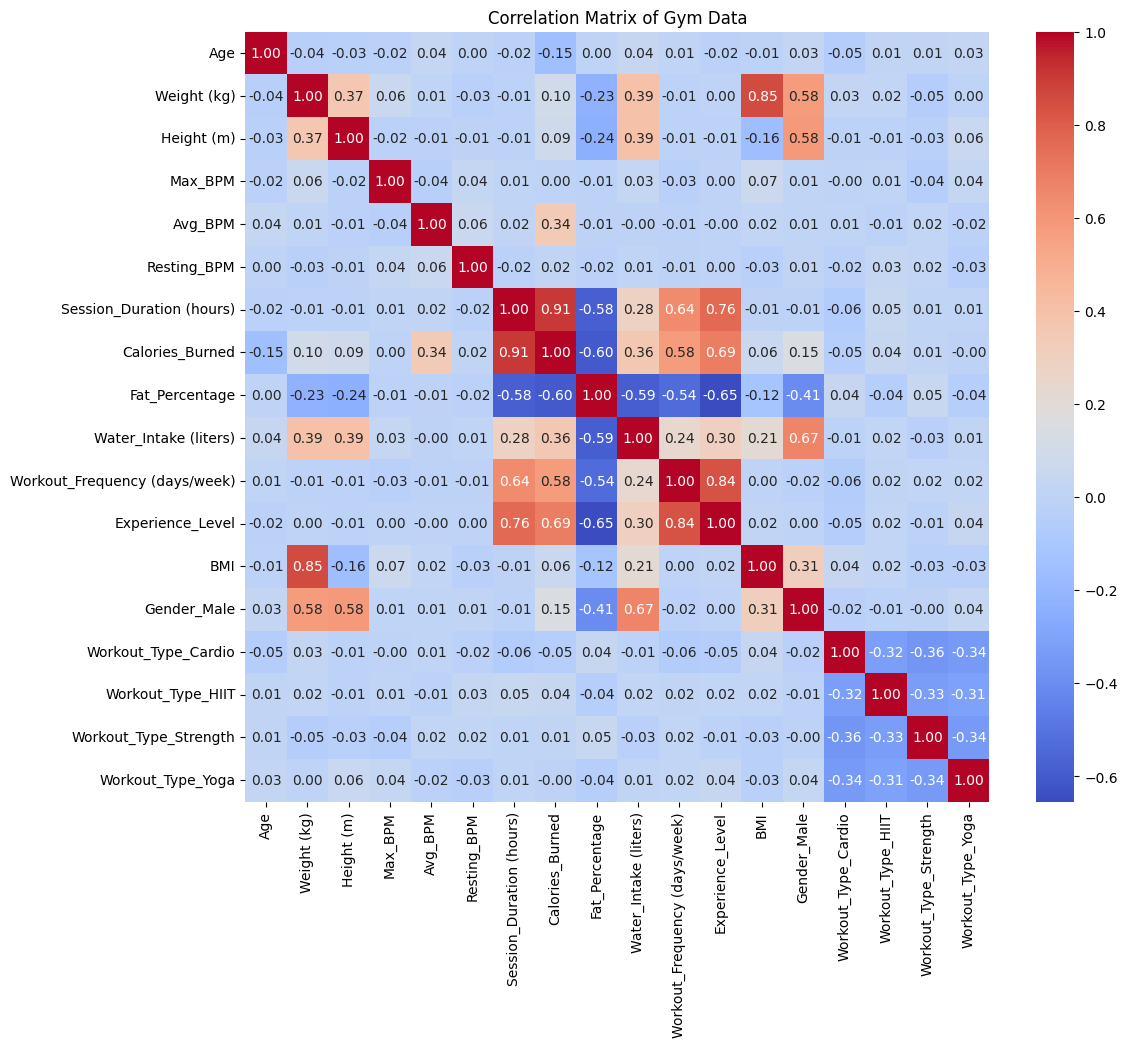

In [45]:
correlation_matrix = gym.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Gym Data')
plt.show()

In [46]:
gym.columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Gender_Male', 'Workout_Type_Cardio',
       'Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga'],
      dtype='object')

Text(0, 0.5, 'Session Duration (hours)')

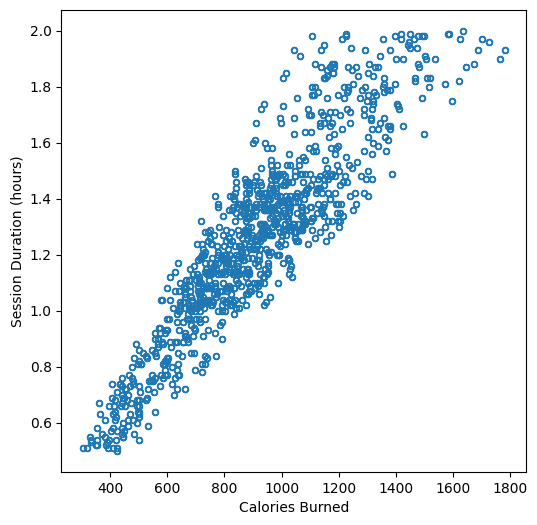

In [59]:
ax = gym.plot.scatter(x='Calories_Burned', y='Session_Duration (hours)', figsize=(6,6), marker='$\u25EF$')
ax.set_xlabel('Calories Burned')
ax.set_ylabel('Session Duration (hours)')

* The variables Calories Burned and the duration of sessions have a positive relationship, the duration of hours goes up or go down down in tandem

* When high values of v1 go with high values of v2, they are positively associated
* When high values of v1 go with low values of v2, they are negatively associated
* The correlation coefficient is a standardized metric, so that it always ranges from -1 (perfect negative correlation) to +1 (perfect positive correlation)
* A correlation of zero indicates no correlation